#Exemplos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 1. Exemplo frutos de maracujá

Definindo dados de entrada

   Azul  Amarelo  Verde  Roxo  Vermelho
0   222       88    146   294        28
1   235      165    189   303       101
2   188      131     87   207        87
3   239       88    200   282       101
4   165      159    245   199       121
5   200      184    194   127       151
6   138      170    196   121       131
7   215      264     91   150        91
8   135      182    295   273        81
9   122      263    286   203       128


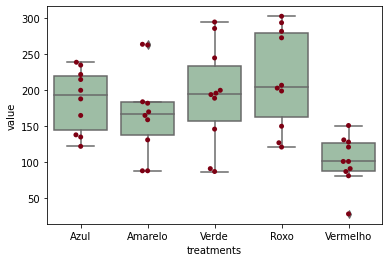

In [ ]:
import pandas as pd
# load data file
df = pd.read_csv("https://docs.google.com/spreadsheets/d/13vodzwV9PCpMOSfigELgUVugcwOPxofLh1OT7ydVlcQ/edit#gid=0".replace('/edit#gid=', '/export?format=csv&gid='))
print(df)
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['Azul', 'Amarelo', 'Verde', 'Roxo', 'Vermelho'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

## Realizar teste F para teste de variância. P-valor é baixo

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['Azul'], df['Amarelo'], df['Verde'], df['Roxo'], df['Vermelho'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

5.620547460587704 0.0009326998409205254


### Realizar teste ANOVA para análise de variância. P-valor é baixo


In [ ]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# output (ANOVA F and p value)

,sum_sq,df,F,PR(>F)
C(treatments),74565.48,4.0,5.620547,0.000933
Residual,149249.10,45.0,NaN,NaN



sum_sq - Soma dos quadrados para termos do modelo

df -  Graus de liberdade

F -  Estatística F para significância do modelo

PR(>F) -   P-valor de significância ao adicionar modelos


## teste T-student para cada um em comparação com vermelho

Todos com p-valor menor que 0.05 (0.025 unicaudal)

In [ ]:
stats.ttest_ind(df['Azul'], df['Vermelho'])


Ttest_indResult(statistic=4.7968621362452755, pvalue=0.00014438331162405495)

In [ ]:
#
stats.levene(df['Azul'],
             df['Vermelho'],
             center= 'mean')

LeveneResult(statistic=1.653033941190207, pvalue=0.2148416729485863)

In [ ]:
stats.ttest_ind(df['Amarelo'], df['Vermelho'])


Ttest_indResult(statistic=3.066439396093124, pvalue=0.006649560276819241)

In [ ]:
#
stats.levene(df['Amarelo'],
             df['Vermelho'],
             center= 'mean')

LeveneResult(statistic=1.659156790860261, pvalue=0.21403041737801196)

In [ ]:
stats.ttest_ind(df['Verde'], df['Vermelho'])


Ttest_indResult(statistic=3.6368115035933033, pvalue=0.001886199501522774)

In [ ]:
# 
stats.levene(df['Verde'],
             df['Vermelho'],
             center= 'mean')

LeveneResult(statistic=2.825960492348867, pvalue=0.11002072284074832)

In [ ]:
stats.ttest_ind(df['Roxo'], df['Vermelho'])


Ttest_indResult(statistic=4.665399673670335, pvalue=0.00019251360220707536)

In [ ]:
# 
stats.levene(df['Roxo'],
             df['Vermelho'],
             center= 'mean')

LeveneResult(statistic=6.87678951527063, pvalue=0.017267147368383414)

In [ ]:
stats.ttest_ind(df['Vermelho'], df['Vermelho'])

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [ ]:
# 
stats.levene(df['Vermelho'],
             df['Vermelho'],
             center= 'mean')

LeveneResult(statistic=0.0, pvalue=1.0)

Podemos deduzir com base nisso que o vermelho é menor que 5% e o unico diferente            

# EXEMPLO: Uma amostra com população

> Problema: Temos a produção de batata de 12 fazendas diferentes. Sabemos que o rendimento padrão da batata para determinada variedade é µ=20.

  * Queremos testar se o rendimento da batata dessas fazendas é significativamente melhor do que o rendimento padrão.

  * n = 12

  * df = n - 1 = 11

  * alpha = 0.05 / nível de confiança de 95%

  Passo 1: Definindo as hipóteses:
    1. H0: µ_data = 20
    2. H1: µ_data > 20

  ref: https://www.machinelearningplus.com/statistics/one-sample-t-test/

In [ ]:
data = [21.5, 24.5, 18.5, 17.2, 14.5, 23.2, 22.1, 20.5, 19.4, 18.1, 24.1, 18.5]
#data = np.random.normal(loc=20.0, scale=3.0, size=50)

In [ ]:
# calculate mean and standard deviation
data = np.asarray(data)
media = np.mean(data)
sd = np.std(data)

print(f'mean: {media}| standard variance: {sd}')

mean: 20.175| standard variance: 2.892555098870201


In [ ]:
#perform one sample t-test
tscore, pvalue = stats.ttest_1samp(data, popmean=20)
print("t Statistic: ", tscore)  
print("P Value: ", pvalue)

t Statistic:  0.2006562773994862
P Value:  0.8446291893053613


> Lembrando que a função ttest_1samp() realiza um teste bicaudal por padrão. 

> Como é um teste unicaudal (de acordo com H1), o valor-p real é 0,8446/2 = 0,4223. 

> Não rejeitamos a hipótese nula.

# INDEPENDENT T-TEST

> Problema: Verificar se a pressão arterial média após tratamento de um grupo de homens e de mulheres possui diferença.

> Suposições de teste paramétrico

    * As distribuições populacionais são normais
    * As amostras têm variações iguais
    * As duas amostras são independentes

    
  * alpha = 0.05 / nível de confiança de 95%

  Passo 1: Definindo as hipóteses:
    1. H0: as médias pós tratamento, para homens e mulheres, são iguais.
    2. H1: as médias pós tratamento, para homens e mulheres, são diferentes.

ref : https://www.pythonfordatascience.org/independent-samples-t-test-python/

In [ ]:
# load data
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/blood_pressure.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


In [ ]:
male = df['bp_after'][df['sex'] == 'Male']
female = df['bp_after'][df['sex'] == 'Female']
#male = np.random.normal(loc=155.5, scale=15.24, size=50); male = pd.DataFrame(male, columns=['m'])['m'] 
#male = np.random.normal(loc=155.5, scale=13.24, size=50); male = pd.DataFrame(male, columns=['m'])['m'] 
#female = np.random.normal(loc=147.2, scale=11.74, size=50); female = pd.DataFrame(female, columns=['f'])['f'] 
#female = np.random.normal(loc=147.2, scale=12.74, size=50); female = pd.DataFrame(female, columns=['f'])['f'] 


In [ ]:
# t test
stats.ttest_ind(male, female)

Ttest_indResult(statistic=3.3479506182111387, pvalue=0.0010930222986154283)

> Existe uma diferença estatisticamente significativa na pressão arterial média pós tratamento entre homens e mulheres

* t= 3,3480

* p= 0,001

### Verificar normalidade

In [ ]:
# ASSUMPTION CHECK
# 1. normal distribution
sampling_difference = male.values - \
                      female.values

stats.shapiro(sampling_difference)

#(W test statistic, p-value)

ShapiroResult(statistic=0.98586106300354, pvalue=0.7147841453552246)

* O teste não é significativo, o que indica que a distribuição amostral é normalmente distribuída.

> Visual check:
  * útil quando a amostra é grande.

Um método de verificar visualmente a distribuição é usar um gráfico de probabilidade com ou sem o valor de correlação, para avaliar a correlação dos valores observados com a distribuição teórica em questão - no caso atual, seria a distribuição gaussiana (também conhecida como normal).


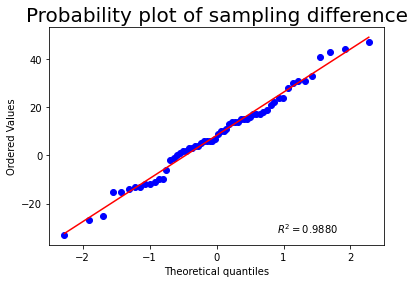

In [ ]:
# visual check of distribution
fig = plt.figure() #figsize= (20, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(sampling_difference, plot= plt, rvalue= True)
ax.set_title("Probability plot of sampling difference", fontsize= 20)
ax.set

plt.show()

### Verificar variâncias

> Teste de homogeneidade de variâncias
  * Uma das suposições é que ambos os grupos têm variâncias iguais. Um método para testar essa suposição é o teste de homogeneidade de variâncias de Levene.

In [ ]:
# 2. homogeneity of variance
stats.levene(male,
             female,
             center= 'mean')

LeveneResult(statistic=5.865854141268659, pvalue=0.01695904277978066)

> Visual check II
* O teste é significativo, o que indica que os grupos têm uma quantidade diferente de variação e que o teste t pode não ser o melhor método estatístico a ser usado. Novamente, pode valer a pena verificar essa suposição visualmente também.

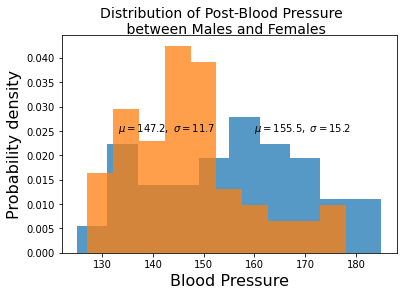

In [ ]:
fig = plt.figure() #figsize= (20, 10))
ax = fig.add_subplot(111)


p_bp_male = plt.hist(male, label= "Male",
                     density= True,
                     alpha=0.75)
p_bp_female = plt.hist(female, label= "Female",
                       density= True,
                       alpha=0.75)


plt.suptitle("Distribution of Post-Blood Pressure \n between Males and Females", fontsize= 14)
plt.xlabel("Blood Pressure", fontsize= 16)
plt.ylabel("Probability density", fontsize= 16)

plt.text(133, .025,
         f"$\mu= {female.mean(): .1f}, \ \sigma= {female.std(): .1f}$")
plt.text(160, .025,
         f"$\mu= {male.mean(): .1f}, \ \sigma= {male.std(): .1f}$")


plt.show()

> Existem diferentes maneiras de lidar com a heteroscedasticidade (variância desigual). Algumas opções incluem, mas não estão limitadas a, transformar a variável dependente (resultado), usar médias aparadas, erros padrão robustos ou usar um teste paramétrico como o teste t de Welch.

# DEPENDENT T-TEST

> Considerando que queremos saber se um óleo de motor impacta significativamente a quilometragem do carro de diferentes marcas. 
Para testar isso, temos inicialmente **10 carros** em uma garagem dopada com óleo de motor original. Anotamos sua quilometragem por 100 quilômetros cada. 
Em seguida, dopamos cada um dos carros com outro óleo de motor (diferente do original). Então, a quilometragem dos carros é calculada para 100 quilômetros cada. 

* Para comparar a diferença entre a quilometragem média do primeiro e do segundo teste, usamos um teste t de amostras pareadas porque, para cada carro, a pontuação do primeiro teste pode ser pareada com a pontuação do segundo teste.

  * alpha = 0.05 / nível de confiança de 95%

  Passo 1: Definindo as hipóteses:
    1. H0: as médias pré-teste e pós-teste são iguais
    2. H1: as médias pré-teste e pós-teste não são iguais

ref: https://www.geeksforgeeks.org/how-to-conduct-a-paired-samples-t-test-in-python/


In [ ]:
# pre holds the mileage before applying
# the different engine oil
pre = [88, 82, 84, 93, 75, 78, 84, 87,
       95, 91, 83, 89, 77, 68, 91]
#pre = np.random.normal(loc=84.3, scale=7.44, size=50)
  
# post holds the mileage before applying 
# the different engine oil
post = [91, 84, 88, 90, 79, 80, 88, 90, 
        90, 96, 88, 89, 81, 74, 92]
#post = np.random.normal(loc=86.6, scale=5.86, size=50)
stats.ttest_rel(pre, post)

Ttest_relResult(statistic=-2.9732484231168796, pvalue=0.01007144862643272)

In [6]:
# pre holds the mileage before 
# applying the different engine oil
pre = [30, 31, 34, 40, 36, 35,
       34, 30, 28, 29]
#pre = np.random.normal(loc=32.7, scale=3.74, size=50)
  
# post holds the mileage after 
# applying the different engine oil
post = [30, 31, 32, 38, 32, 31,
        32, 29, 28, 30]
#pre = np.random.normal(loc=31.7, scale=2.71, size=50)
  
# Performing the paired sample t-test
stats.ttest_rel(pre, post)

Ttest_relResult(statistic=2.584921310565987, pvalue=0.029457853822895275)

> Como o valor-p é igual a 0,029, que é menor que 0,05, rejeitamos a hipótese nula. Portanto, não existe comprovação estatística de que a média real do teste é igual para carros antes e depois da aplicação do óleo de motor diferente.